# 06-16-Sklearn 实现SVM2 输出常用属性值

In [1]:
# 使用numpy 读取数据集
import numpy as np

def load_data(file_name):
    data = np.loadtxt(file_name, delimiter='\t')
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

In [2]:
# load data
X,y = load_data('data/svm2.txt')

In [4]:
# 建立SVM 分类器并输出常用属性值
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0)
model.fit(X, y)
print("支持向量的个数：", model.n_support_)
print("支持向量在样本中的索引：", model.support_)
print("支持向量对应的标签：", model.support_vectors_)
print("支持向量的alpha值：", model.dual_coef_)

print("支持向量机的评估分数：", model.score(X, y))

支持向量的个数： [16 12]
支持向量在样本中的索引： [ 6 21 27 30 36 41 42 48 53 58 65 76 78 85 87 99 14 18 19 23 26 29 34 45
 54 56 62 74]
支持向量对应的标签： [[-0.557789  0.375797]
 [-0.475167 -0.346247]
 [ 0.61908  -0.088188]
 [ 0.539368 -0.374972]
 [-0.403483  0.474466]
 [-0.012998  0.525985]
 [ 0.153738  0.491531]
 [-0.7016    0.190983]
 [ 0.595222  0.20957 ]
 [-0.307768  0.503038]
 [-0.755431  0.096711]
 [ 0.334204  0.381237]
 [ 0.227222  0.527437]
 [ 0.297885 -0.632874]
 [ 0.541359 -0.205969]
 [-0.725568 -0.292022]
 [-0.413576  0.145681]
 [-0.392868 -0.125261]
 [ 0.353588 -0.070617]
 [ 0.394164 -0.058217]
 [-0.449349 -0.038074]
 [-0.015165  0.359326]
 [ 0.253289 -0.285861]
 [ 0.068286  0.392741]
 [ 0.229465  0.250409]
 [ 0.3843   -0.17657 ]
 [-0.203272  0.286855]
 [-0.448939  0.176725]]
支持向量的alpha值： [[-0.41958351 -1.         -1.         -0.76568057 -0.87441932 -1.
  -1.         -1.         -0.44300379 -1.         -0.38183024 -1.
  -0.09168169 -0.61099064 -1.         -0.41281024  1.          1.
   1.          1

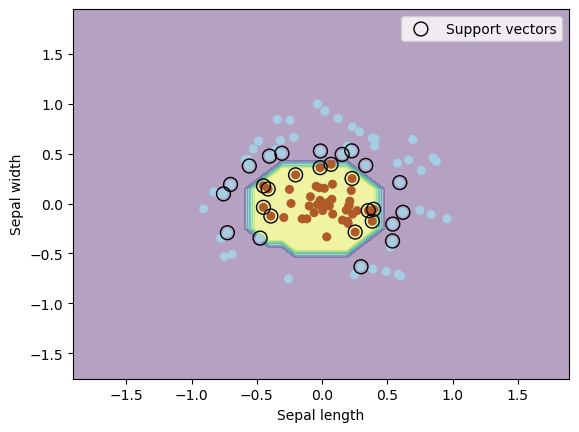

In [6]:
# 数据可视化
# 绘制分割超平面
import matplotlib.pyplot as plt
fig2 = plt.figure()

# 画决策边界
h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


# 绘制支持向量
sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', label='Support vectors')


plt.legend()
plt.show()